In [7]:
import pandas as pd
import numpy as np
from mortgage import Loan
import datetime as dt
import matplotlib.pyplot as plt 

In [8]:
df_2013 = pd.read_csv('clean_2013_mls.csv')
df_2014 = pd.read_csv('clean_2014_mls.csv')
df_2015 = pd.read_csv('clean_2015_mls.csv')
df_2016 = pd.read_csv('clean_2016_mls.csv')
df_2017 = pd.read_csv('clean_2017_mls.csv')

,Unnamed: 0,Zip Code,Square Footage,List Price,Sold Price Per Foot,Sold Price,Sold Date
0,0,78759,2126,379888,177.80,378000,11/22/2013
1,1,78731,2372,399900,160.20,380000,9/12/2013
2,2,78731,1662,396000,228.64,380000,7/3/2013
3,3,78731,2104,449000,182.98,385000,9/16/2013
4,4,78759,1877,385000,205.11,385000,7/24/2013
5,5,78759,2355,389900,165.56,389900,8/26/2013
6,6,78759,2440,400000,159.84,390000,9/12/2013
7,7,78759,1815,399950,215.95,391950,9/18/2013
8,8,78759,1975,399999,200.25,395500,8/23/2013
9,9,78759,2687,420000,148.86,400000,10/15/2013


In [134]:
loan = Loan(principal=1035000.0, interest=.0387, term=30, start_date=(2017,3,1))
loan.summarize

Original Balance:         $  1,035,000
Interest Rate:             0.03869999999999999662492200514 %
APY:                              3.94 %
APR:                              3.87 %
Term:                               30 years
Monthly Payment:          $    4863.99

Total principal payments: $1,035,000.00
Total interest payments:  $ 716,037.92
Total payments:           $1,751,037.92
Interest to principal:            69.2 %
Years to pay:                     30.0


In [135]:
df3 = pd.DataFrame(df_2013)
df3['Sold Date'] = df3['Sold Date'].map(lambda x: dt.datetime.strptime(x, '%m/%d/%Y').month)
df4 = pd.DataFrame(df_2014)
df4['Sold Date'] = df4['Sold Date'].map(lambda x: dt.datetime.strptime(x, '%m/%d/%Y').month)
df5 = pd.DataFrame(df_2015)
df5['Sold Date'] = df5['Sold Date'].map(lambda x: dt.datetime.strptime(x, '%m/%d/%Y').month)
df6 = pd.DataFrame(df_2016)
df6['Sold Date'] = df6['Sold Date'].map(lambda x: dt.datetime.strptime(x, '%m/%d/%Y').month)
df7 = pd.DataFrame(df_2017)
df7['Sold Date'] = df7['Sold Date'].map(lambda x: dt.datetime.strptime(x, '%m/%d/%Y').month)


In [136]:
month_2013_df = pd.DataFrame(df3)
month_2013_df = month_2013_df.groupby(['Sold Date','Zip Code']).median()

month_2013_df['Loan Amount'] = month_2013_df['Sold Price'].map(lambda x:(x*.9))
month_2013_df['Property Tax/Month'] = round(month_2013_df['Sold Price'].map(lambda x: (x*.023)/12),2)   
month_2013_df['Principle and Interest Payment/Month'] = round(month_2013_df['Loan Amount'].map(lambda x: float(x*.0564)/12),2)
month_2013_df['insurance payment/Month'] = round(month_2013_df['Sold Price'].map(lambda x: float(x*.005)/12),2)

month_2013_df['total cost/Month'] = month_2013_df['Principle and Interest Payment/Month'] + month_2013_df['Property Tax/Month'] + month_2013_df['insurance payment/Month']
month_2013_df.head()
# monthly_cost = ['1429.320324','1580.134714','1768.982461','1956.623692','2084.082950']
# monthly_cost


Unnamed: 0  Square Footage  List Price  \
Sold Date Zip Code                                           
1         78702        10374.0          1108.0    185000.0   
          78703        10060.0          2706.0    720000.0   
          78704        10467.0          1638.0    439000.0   
          78705        11534.0          2106.0    579900.0   
          78717        11288.5          2649.0    290500.0   

                    Sold Price Per Foot  Sold Price  Loan Amount  \
Sold Date Zip Code                                                 
1         78702                 180.420    177000.0     159300.0   
          78703                 296.380    705000.0     634500.0   
          78704                 276.150    426000.0     383400.0   
          78705                 274.290    540000.0     486000.0   
          78717                 106.145    280500.0     252450.0   

                    Property Tax/Month  Principle and Interest Payment/Month  \
Sold Date Zip Code                                                             
1         78702                 339.25                                748.71   
          78703                1351.25                               2982.15   
          78704                 816.50                               1801.98   
          78705                1035.00                               2284.20   
          78717                 537.62                               1186.52   

                    insurance payment/Month  total cost/Month  
Sold Date Zip Code                                             
1         78702                       73.75           1161.71  
          78703                      293.75           4627.15  
          78704                      177.50           2795.98  
          78705                      225.00           3544.20  
          78717                      116.88           1841.02

In [137]:
month_2013_df['total cost/Month'].median()

1942.54

In [138]:
new3 = month_2013_df.reset_index().pivot(index='Sold Date', columns='Zip Code', values='total cost/Month').median()
new4 = month_2014_df.reset_index().pivot(index='Sold Date', columns='Zip Code', values='total cost/Month').median()
new5 = month_2015_df.reset_index().pivot(index='Sold Date', columns='Zip Code', values='total cost/Month').median()
new6 = month_2016_df.reset_index().pivot(index='Sold Date', columns='Zip Code', values='total cost/Month').median()
new7 = month_2017_df.reset_index().pivot(index='Sold Date', columns='Zip Code', values='total cost/Month').median()
# pd.DataFrame(new3)

In [10]:
month_2014_df = pd.DataFrame(df4)
month_2014_df = month_2014_df.groupby(['Sold Date','Zip Code']).median()

month_2014_df['Loan Amount'] = month_2014_df['Sold Price'].map(lambda x:(x*.9))
month_2014_df['Property Tax/Month'] = round(month_2014_df['Sold Price'].map(lambda x: (x*.023)/12),2)   
month_2014_df['Principle and Interest Payment/Month'] = round(month_2014_df['Loan Amount'].map(lambda x: float(x*.0564)/12),2)
month_2014_df['insurance payment/Month'] = round(month_2014_df['Sold Price'].map(lambda x: float(x*.005)/12),2)

month_2014_df['total cost/Month'] = month_2014_df['Principle and Interest Payment/Month'] + month_2014_df['Property Tax/Month'] + month_2014_df['insurance payment/Month']
month_2014_df.head()

Unnamed: 0  Square Footage  List Price  \
Sold Date Zip Code                                           
1         78641         7408.0          3597.0    769380.0   
          78702        10252.5          1330.0    344749.5   
          78703        10021.0          1436.0    550000.0   
          78704        10341.5          1481.0    497500.0   
          78705        10552.5          2239.5    745000.0   

                    Sold Price Per Foot  Sold Price  Loan Amount  \
Sold Date Zip Code                                                 
1         78641                 213.890    769380.0    692442.00   
          78702                 233.675    318616.5    286754.85   
          78703                 361.610    533000.0    479700.00   
          78704                 323.135    478750.0    430875.00   
          78705                 319.400    682000.0    613800.00   

                    Property Tax/Month  Principle and Interest Payment/Month  \
Sold Date Zip Code                                                             
1         78641                1474.64                               3254.48   
          78702                 610.68                               1347.75   
          78703                1021.58                               2254.59   
          78704                 917.60                               2025.11   
          78705                1307.17                               2884.86   

                    insurance payment/Month  total cost/Month  
Sold Date Zip Code                                             
1         78641                      320.58           5049.70  
          78702                      132.76           2091.19  
          78703                      222.08           3498.25  
          78704                      199.48           3142.19  
          78705                      284.17           4476.20

In [11]:
month_2014_df.median()

Unnamed: 0                                5402.500
Square Footage                            1921.000
List Price                              325000.000
Sold Price Per Foot                        153.875
Sold Price                              320000.000
Loan Amount                             288000.000
Property Tax/Month                         613.330
Principle and Interest Payment/Month      1353.600
insurance payment/Month                    133.330
total cost/Month                          2100.260
dtype: float64

In [12]:
month_2015_df = pd.DataFrame(df5)
month_2015_df = month_2015_df.groupby(['Sold Date','Zip Code']).median()

month_2015_df['Loan Amount'] = month_2015_df['Sold Price'].map(lambda x:(x*.9))
month_2015_df['Property Tax/Month'] = round(month_2015_df['Sold Price'].map(lambda x: (x*.023)/12),2)   
month_2015_df['Principle and Interest Payment/Month'] = round(month_2015_df['Loan Amount'].map(lambda x: float(x*.0564)/12),2)
month_2015_df['insurance payment/Month'] = round(month_2015_df['Sold Price'].map(lambda x: float(x*.005)/12),2)

month_2015_df['total cost/Month'] = month_2015_df['Principle and Interest Payment/Month'] + month_2015_df['Property Tax/Month'] + month_2015_df['insurance payment/Month']
month_2015_df.head()

Unnamed: 0  Square Footage  List Price  \
Sold Date Zip Code                                           
1         78652        11186.0          1692.0    295996.0   
          78702        10295.0          1204.0    350000.0   
          78703        10049.0          3101.0   1195000.0   
          78704        10367.5          1834.5    504450.0   
          78705        10598.5          1959.0    722500.0   

                    Sold Price Per Foot  Sold Price  Loan Amount  \
Sold Date Zip Code                                                 
1         78652                 159.510    269897.0     242907.3   
          78702                 285.040    350000.0     315000.0   
          78703                 360.050   1116500.0    1004850.0   
          78704                 319.205    500500.0     450450.0   
          78705                 390.485    709250.0     638325.0   

                    Property Tax/Month  Principle and Interest Payment/Month  \
Sold Date Zip Code                                                             
1         78652                 517.30                               1141.66   
          78702                 670.83                               1480.50   
          78703                2139.96                               4722.80   
          78704                 959.29                               2117.12   
          78705                1359.40                               3000.13   

                    insurance payment/Month  total cost/Month  
Sold Date Zip Code                                             
1         78652                      112.46           1771.42  
          78702                      145.83           2297.16  
          78703                      465.21           7327.97  
          78704                      208.54           3284.95  
          78705                      295.52           4655.05

In [13]:
month_2015_df.median()

Unnamed: 0                                5564.000
Square Footage                            1900.250
List Price                              351008.000
Sold Price Per Foot                        164.780
Sold Price                              345075.000
Loan Amount                             310567.500
Property Tax/Month                         661.395
Principle and Interest Payment/Month      1459.665
insurance payment/Month                    143.780
total cost/Month                          2264.840
dtype: float64

In [14]:
month_2016_df = pd.DataFrame(df6)
month_2016_df = month_2016_df.groupby(['Sold Date','Zip Code']).median()

month_2016_df['Loan Amount'] = month_2016_df['Sold Price'].map(lambda x:(x*.9))
month_2016_df['Property Tax/Month'] = round(month_2016_df['Sold Price'].map(lambda x: (x*.023)/12),2)   
month_2016_df['Principle and Interest Payment/Month'] = round(month_2016_df['Loan Amount'].map(lambda x: float(x*.0564)/12),2)
month_2016_df['insurance payment/Month'] = round(month_2016_df['Sold Price'].map(lambda x: float(x*.005)/12),2)

month_2016_df['total cost/Month'] = month_2016_df['Principle and Interest Payment/Month'] + month_2016_df['Property Tax/Month'] + month_2016_df['insurance payment/Month']
month_2016_df.head()

Unnamed: 0  Square Footage  List Price  \
Sold Date Zip Code                                           
1         78702        10364.0           916.0    350000.0   
          78703        10047.5          2456.0    877000.0   
          78704        10456.0          1762.0    550000.0   
          78717        10807.0          2304.5    336750.0   
          78721        10351.0          1434.0    289450.0   

                    Sold Price Per Foot  Sold Price  Loan Amount  \
Sold Date Zip Code                                                 
1         78702                 310.870    349000.0     314100.0   
          78703                 359.845    850000.0     765000.0   
          78704                 373.790    540000.0     486000.0   
          78717                 144.210    332500.0     299250.0   
          78721                 211.755    272000.0     244800.0   

                    Property Tax/Month  Principle and Interest Payment/Month  \
Sold Date Zip Code                                                             
1         78702                 668.92                               1476.27   
          78703                1629.17                               3595.50   
          78704                1035.00                               2284.20   
          78717                 637.29                               1406.48   
          78721                 521.33                               1150.56   

                    insurance payment/Month  total cost/Month  
Sold Date Zip Code                                             
1         78702                      145.42           2290.61  
          78703                      354.17           5578.84  
          78704                      225.00           3544.20  
          78717                      138.54           2182.31  
          78721                      113.33           1785.22

In [15]:
month_2016_df.median()

Unnamed: 0                                5500.0000
Square Footage                            1965.0000
List Price                              376075.0000
Sold Price Per Foot                        174.3925
Sold Price                              373125.0000
Loan Amount                             335812.5000
Property Tax/Month                         715.1550
Principle and Interest Payment/Month      1578.3200
insurance payment/Month                    155.4700
total cost/Month                          2448.9450
dtype: float64

In [50]:
month_2017_df = pd.DataFrame(df7)
month_2017_df = month_2017_df.groupby(['Sold Date','Zip Code']).median()

month_2017_df['Loan Amount'] = month_2017_df['Sold Price'].map(lambda x:(x*.9))
month_2017_df['Property Tax/Month'] = round(month_2017_df['Sold Price'].map(lambda x: (x*.023)/12),2)   
month_2017_df['Principle and Interest Payment/Month'] = round(month_2017_df['Loan Amount'].map(lambda x: float(x*.0564)/12),2)
month_2017_df['insurance payment/Month'] = round(month_2017_df['Sold Price'].map(lambda x: float(x*.005)/12),2)

month_2017_df['total cost/Month'] = month_2017_df['Principle and Interest Payment/Month'] + month_2017_df['Property Tax/Month'] + month_2017_df['insurance payment/Month']
month_2017_df.head()

Unnamed: 0  Square Footage  List Price  \
Sold Date Zip Code                                           
1         78660         8739.0          2591.0    298855.0   
          78702         6347.0          1569.0    385000.0   
          78703         5153.0          2154.0    750000.0   
          78704         6641.0          1893.0    749900.0   
          78705        10469.0          1671.0    639990.0   

                    Sold Price Per Foot  Sold Price  Loan Amount  \
Sold Date Zip Code                                                 
1         78660                  113.07    292499.0     263249.1   
          78702                  277.84    360000.0     324000.0   
          78703                  361.41    743000.0     668700.0   
          78704                  412.29    727403.0     654662.7   
          78705                  371.04    620000.0     558000.0   

                    Property Tax/Month  Principle and Interest Payment/Month  \
Sold Date Zip Code                                                             
1         78660                 560.62                               1237.27   
          78702                 690.00                               1522.80   
          78703                1424.08                               3142.89   
          78704                1394.19                               3076.91   
          78705                1188.33                               2622.60   

                    insurance payment/Month  total cost/Month  
Sold Date Zip Code                                             
1         78660                      121.87           1919.76  
          78702                      150.00           2362.80  
          78703                      309.58           4876.55  
          78704                      303.08           4774.18  
          78705                      258.33           4069.26

In [17]:
month_2017_df.median()

Unnamed: 0                                4979.000
Square Footage                            1943.000
List Price                              392450.000
Sold Price Per Foot                        188.175
Sold Price                              390000.000
Loan Amount                             351000.000
Property Tax/Month                         747.500
Principle and Interest Payment/Month      1649.700
insurance payment/Month                    162.500
total cost/Month                          2559.700
dtype: float64

In [18]:
grouped_2013_df = pd.DataFrame(df_2013)
grouped_2013_df = grouped_2013_df.groupby('Zip Code').median()

#Loan Amount is 90% of the Price because of 10% down payment
grouped_2013_df['Loan Amount'] = grouped_2013_df['Sold Price'].map(lambda x: float(x*.9))

#property taxes of 2.3%
grouped_2013_df['Property Tax/Month'] = round(grouped_2013_df['Sold Price'].map(lambda x: float(x*.023)/12),2)

#principle and interest of 3%
grouped_2013_df['Principle and Interest Payment/Month'] = round(grouped_2013_df['Loan Amount'].map(lambda x: float(x*.0564)/12),2)

#insurance payment of 1/2 percent
grouped_2013_df['insurance payment/Month'] = round(grouped_2013_df['Sold Price'].map(lambda x: float(x*.005)/12),2)

grouped_2013_df['total cost/Month'] = grouped_2013_df['Principle and Interest Payment/Month'] + grouped_2013_df['Property Tax/Month'] + grouped_2013_df['insurance payment/Month']

In [19]:
grouped_2013_df.head(30)

,Unnamed: 0,Square Footage,List Price,Sold Price Per Foot,Sold Price,Sold Date,Loan Amount,Property Tax/Month,Principle and Interest Payment/Month,insurance payment/Month,total cost/Month
Zip Code,,,,,,,,,,,
78613,2626.0,3593.0,442490.0,114.110,410000.0,11.0,369000.00,785.83,1734.30,170.83,2690.96
78644,4148.0,2755.0,255248.0,89.020,245248.0,11.0,220723.20,470.06,1037.40,102.19,1609.65
78652,7655.0,2372.0,349000.0,137.020,325000.0,4.0,292500.00,622.92,1374.75,135.42,2133.09
78701,7493.0,3127.0,1200000.0,310.780,1150000.0,7.0,1035000.00,2204.17,4864.50,479.17,7547.84
78702,6304.0,1212.0,289900.0,222.470,280000.0,6.0,252000.00,536.67,1184.40,116.67,1837.74
78703,5168.5,2730.0,804000.0,323.385,801500.0,6.0,721350.00,1536.21,3390.34,333.96,5260.51
78704,6490.0,1663.0,449900.0,282.680,449000.0,7.0,404100.00,860.58,1899.27,187.08,2946.93
78705,9822.5,1975.5,576950.0,281.015,537500.0,6.0,483750.00,1030.21,2273.62,223.96,3527.79
78717,7456.0,2531.0,279000.0,111.110,272000.0,7.0,244800.00,521.33,1150.56,113.33,1785.22


In [20]:
# grouped_2013_df['Sold Price'].median()
grouped_2013_df['total cost/Month'].median()
# grouped_2013_df['total cost/Month'].mean()

1941.925

In [21]:
grouped_2014_df = pd.DataFrame(df_2014)
grouped_2014_df = grouped_2014_df.groupby('Zip Code').median()

#Loan Amount is 90% of the Price because of 10% down payment
grouped_2014_df['Loan Amount'] = grouped_2014_df['Sold Price'].map(lambda x: float(x*.9))

#property taxes of 2.3%
grouped_2014_df['Property Tax/Month'] = round(grouped_2014_df['Sold Price'].map(lambda x: float(x*.023)/12),2)

#principle and interest of 3%
grouped_2014_df['Principle and Interest Payment/Month'] = round(grouped_2014_df['Loan Amount'].map(lambda x: float(x*.0564)/12),2)

#insurance payment of 1/2 percent
grouped_2014_df['insurance payment/Month'] = round(grouped_2014_df['Sold Price'].map(lambda x: float(x*.005)/12),2)

grouped_2014_df['total cost/Month'] = grouped_2014_df['Principle and Interest Payment/Month'] + grouped_2014_df['Property Tax/Month'] + grouped_2014_df['insurance payment/Month']


In [22]:
grouped_2014_df.head()

,Unnamed: 0,Square Footage,List Price,Sold Price Per Foot,Sold Price,Sold Date,Loan Amount,Property Tax/Month,Principle and Interest Payment/Month,insurance payment/Month,total cost/Month
Zip Code,,,,,,,,,,,
78617,9218.0,1448.0,119900.0,79.420,115000.0,5.0,103500.00,220.42,486.45,47.92,754.79
78641,5092.0,2673.5,494640.0,169.775,494640.0,6.0,445176.00,948.06,2092.33,206.10,3246.49
78652,6904.5,2074.0,298644.5,137.745,280630.5,12.0,252567.45,537.88,1187.07,116.93,1841.88
78653,8157.0,1722.0,165000.0,97.560,168000.0,4.0,151200.00,322.00,710.64,70.00,1102.64
78660,3770.0,2313.0,265892.0,112.840,260992.0,10.0,234892.80,500.23,1104.00,108.75,1712.98


In [23]:
#grouped_2014_df['total cost/Month'].mean()
grouped_2014_df['total cost/Month'].median()

2017.09

In [24]:
grouped_2014_df.count()

Unnamed: 0                              49
Square Footage                          49
List Price                              49
Sold Price Per Foot                     49
Sold Price                              49
Sold Date                               49
Loan Amount                             49
Property Tax/Month                      49
Principle and Interest Payment/Month    49
insurance payment/Month                 49
total cost/Month                        49
dtype: int64

In [25]:
grouped_2015_df = pd.DataFrame(df_2015)
grouped_2015_df = grouped_2015_df.groupby('Zip Code').median()

#Loan Amount is 90% of the Price because of 10% down payment
grouped_2015_df['Loan Amount'] = grouped_2015_df['Sold Price'].map(lambda x: float(x*.9))

#property taxes of 2.3%
grouped_2015_df['Property Tax/Month'] = round(grouped_2015_df['Sold Price'].map(lambda x: float(x*.023)/12),2)

#principle and interest of 3%
grouped_2015_df['Principle and Interest Payment/Month'] = round(grouped_2015_df['Loan Amount'].map(lambda x: float(x*.0564)/12),2)

#insurance payment of 1/2 percent
grouped_2015_df['insurance payment/Month'] = round(grouped_2015_df['Sold Price'].map(lambda x: float(x*.005)/12),2)

grouped_2015_df['total cost/Month'] = grouped_2015_df['Principle and Interest Payment/Month'] + grouped_2015_df['Property Tax/Month'] + grouped_2015_df['insurance payment/Month']


In [26]:
grouped_2015_df.head()

,Unnamed: 0,Square Footage,List Price,Sold Price Per Foot,Sold Price,Sold Date,Loan Amount,Property Tax/Month,Principle and Interest Payment/Month,insurance payment/Month,total cost/Month
Zip Code,,,,,,,,,,,
78617,9201.0,2412.0,218980.0,85.12,205304.0,10.0,184773.6,393.50,868.44,85.54,1347.48
78652,11214.0,2496.0,326740.0,129.18,307117.0,3.0,276405.3,588.64,1299.10,127.97,2015.71
78653,3262.0,2298.0,205000.0,90.08,207000.0,7.0,186300.0,396.75,875.61,86.25,1358.61
78660,3710.0,1683.0,179900.0,110.52,186000.0,6.0,167400.0,356.50,786.78,77.50,1220.78
78681,3951.0,2280.0,249000.0,109.21,249000.0,7.0,224100.0,477.25,1053.27,103.75,1634.27


In [27]:
# grouped_2015_df.count()

In [28]:
# grouped_2015_df['total cost/Month'].mean()
grouped_2015_df['total cost/Month'].median()

2133.09

In [29]:
grouped_2016_df = pd.DataFrame(df_2016)
grouped_2016_df = grouped_2016_df.groupby('Zip Code').median()

#Loan Amount is 90% of the Price because of 10% down payment
grouped_2016_df['Loan Amount'] = grouped_2016_df['Sold Price'].map(lambda x: float(x*.9))

#property taxes of 2.3%
grouped_2016_df['Property Tax/Month'] = round(grouped_2016_df['Sold Price'].map(lambda x: float(x*.023)/12),2)

#principle and interest of 3%
grouped_2016_df['Principle and Interest Payment/Month'] = round(grouped_2016_df['Loan Amount'].map(lambda x: float(x*.0564)/12),2)

#insurance payment of 1/2 percent
grouped_2016_df['insurance payment/Month'] = round(grouped_2016_df['Sold Price'].map(lambda x: float(x*.005)/12),2)

grouped_2016_df['total cost/Month'] = grouped_2016_df['Principle and Interest Payment/Month'] + grouped_2016_df['Property Tax/Month'] + grouped_2016_df['insurance payment/Month']
grouped_2016_df.head()

,Unnamed: 0,Square Footage,List Price,Sold Price Per Foot,Sold Price,Sold Date,Loan Amount,Property Tax/Month,Principle and Interest Payment/Month,insurance payment/Month,total cost/Month
Zip Code,,,,,,,,,,,
78613,10800.0,3297.0,379000.0,118.02,389100.0,3.0,350190.0,745.78,1645.89,162.12,2553.79
78617,9233.5,802.0,74500.0,99.45,72500.0,5.0,65250.0,138.96,306.68,30.21,475.85
78620,7594.0,2539.0,435981.0,155.18,394000.0,8.0,354600.0,755.17,1666.62,164.17,2585.96
78641,2739.0,4381.0,550000.0,116.41,510000.0,9.0,459000.0,977.50,2157.30,212.50,3347.30
78652,4431.0,2074.0,338920.0,154.54,320688.0,10.0,288619.2,614.65,1356.51,133.62,2104.78


In [30]:
grouped_2016_df.count()
# grouped_2016_df['total cost/Month'].mean()

Unnamed: 0                              49
Square Footage                          49
List Price                              49
Sold Price Per Foot                     49
Sold Price                              49
Sold Date                               49
Loan Amount                             49
Property Tax/Month                      49
Principle and Interest Payment/Month    49
insurance payment/Month                 49
total cost/Month                        49
dtype: int64

In [31]:
grouped_2016_df['total cost/Month'].median()

2553.79

In [32]:
grouped_2017_df = pd.DataFrame(df_2017)
# for coln in grouped_2017_df.columns:
#     grouped_2017_df[grouped_2017_df[coln] == '7874'] = '78744'

In [33]:
grouped_2017_df = grouped_2017_df.groupby('Zip Code').median()

#Loan Amount is 90% of the Price because of 10% down payment
grouped_2017_df['Loan Amount'] = grouped_2017_df['Sold Price'].map(lambda x: float(x*.9))

#property taxes of 2.3%
grouped_2017_df['Property Tax/Month'] = round(grouped_2017_df['Sold Price'].map(lambda x: float(x*.023)/12),2)

#principle and interest of 3%
grouped_2017_df['Principle and Interest Payment/Month'] = round(grouped_2017_df['Loan Amount'].map(lambda x: float(x*.0564)/12),2)

#insurance payment of 1/2 percent
grouped_2017_df['insurance payment/Month'] = round(grouped_2017_df['Sold Price'].map(lambda x: float(x*.005)/12),2)

grouped_2017_df['total cost/Month'] = grouped_2017_df['Principle and Interest Payment/Month'] + grouped_2017_df['Property Tax/Month'] + grouped_2017_df['insurance payment/Month']
grouped_2017_df.head()

,Unnamed: 0,Square Footage,List Price,Sold Price Per Foot,Sold Price,Sold Date,Loan Amount,Property Tax/Month,Principle and Interest Payment/Month,insurance payment/Month,total cost/Month
Zip Code,,,,,,,,,,,
7874,2541.0,2382.0,336511.0,138.12,329000.0,9.0,296100.0,630.58,1391.67,137.08,2159.33
78617,4204.0,1423.0,183000.0,128.60,183000.0,6.0,164700.0,350.75,774.09,76.25,1201.09
78652,9487.5,2158.0,360252.0,155.46,335750.0,5.0,302175.0,643.52,1420.22,139.90,2203.64
78660,8719.0,1771.0,263900.0,143.37,259900.0,7.0,233910.0,498.14,1099.38,108.29,1705.81
78701,2627.0,3370.0,1285000.0,348.71,1150000.0,8.0,1035000.0,2204.17,4864.50,479.17,7547.84


In [34]:
grouped_2017_df.count()

Unnamed: 0                              47
Square Footage                          47
List Price                              47
Sold Price Per Foot                     47
Sold Price                              47
Sold Date                               47
Loan Amount                             47
Property Tax/Month                      47
Principle and Interest Payment/Month    47
insurance payment/Month                 47
total cost/Month                        47
dtype: int64

In [35]:
#grouped_2017_df['total cost/Month'].mean()
grouped_2017_df['total cost/Month'].median()

2424.34

In [156]:
final_df_2013 = pd.DataFrame(new3).reset_index()
final_df_2013 = final_df_2013.rename(columns={0:'total_cost/zip'})
final_df_2013['funds_over_tot'] = round(final_df_2013['total_cost/zip'].map(lambda x: float(1429.320324/x)),2)
# final_df_2013

final_df_2014 = pd.DataFrame(new4).reset_index()
final_df_2014 = final_df_2014.rename(columns={0:'total_cost/zip'})
final_df_2014['funds_over_tot'] = round(final_df_2014['total_cost/zip'].map(lambda x: float(1429.320324/x)),2)
# final_df_2014

final_df_2015 = pd.DataFrame(new5).reset_index()
final_df_2015 = final_df_2015.rename(columns={0:'total_cost/zip'})
final_df_2015['funds_over_tot'] = round(final_df_2015['total_cost/zip'].map(lambda x: float(1429.320324/x)),2)
# final_df_2015

final_df_2016 = pd.DataFrame(new6).reset_index()
final_df_2016 = final_df_2016.rename(columns={0:'total_cost/zip'})
final_df_2016['funds_over_tot'] = round(final_df_2016['total_cost/zip'].map(lambda x: float(1429.320324/x)),2)
# final_df_2016

final_df_2017 = pd.DataFrame(new7).reset_index()
final_df_2017 = final_df_2017.rename(columns={0:'total_cost/zip'})
final_df_2017['funds_over_tot'] = round(final_df_2017['total_cost/zip'].map(lambda x: float(1429.320324/x)),2)
# final_df_2017

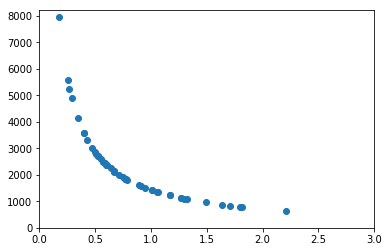

In [176]:
plt.scatter(final_df_2013['funds_over_tot'], final_df_2013['total_cost/zip'])
plt.xlim(0,3)
plt.ylim(0,8200)
plt.show()

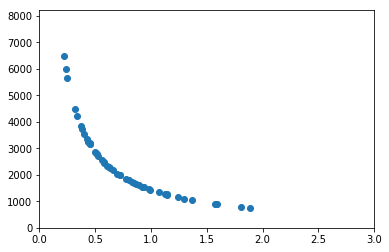

In [177]:
plt.scatter(final_df_2014['funds_over_tot'], final_df_2014['total_cost/zip'])
plt.xlim(0,3)
plt.ylim(0,8200)
plt.show()

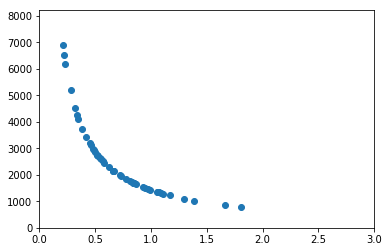

In [178]:
plt.scatter(final_df_2015['funds_over_tot'], final_df_2015['total_cost/zip'])
plt.xlim(0,3)
plt.ylim(0, 8200)
plt.show()

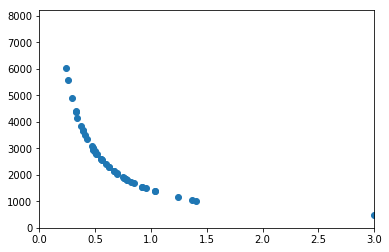

In [179]:
plt.scatter(final_df_2016['funds_over_tot'], final_df_2016['total_cost/zip'])
plt.xlim(0,3)
plt.ylim(0,8200)
plt.show()

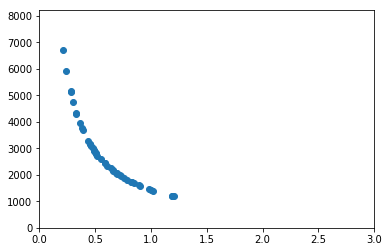

In [180]:
plt.scatter(final_df_2017['funds_over_tot'], final_df_2017['total_cost/zip'])
plt.xlim(0,3)
plt.ylim(0,8200)
plt.show()